<a href="https://colab.research.google.com/github/JGranda11/Proyecto-ai4eng20241/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de dataset desde Kaggle
El dataset se va a tomar usando la API beta de Kaggle, ya que nos interesa interacturar con el conjunto de datos

In [1]:
!pip install kaggle

In [2]:
#Cargar el token de Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jhonatangranda","key":"7dd2bc4d9b9fc9fcaeb5d991e5472b44"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
import kaggle

In [8]:
!kaggle datasets list
#Para probar la conexion a la API de kaggle

ref                                                  title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows               Netflix Movies and TV Shows                      1MB  2024-04-10 09:48:38           5125        106  1.0              
sahirmaharajj/youth-tobacco-survey                   Youth Tobacco Dataset (2 Decades)              264KB  2024-04-11 20:19:31           1058         23  1.0              
mexwell/heart-disease-dataset                        🫀 Heart Disease Dataset                        399KB  2024-04-08 09:43:49           2740         47  1.0              
prishasawhney/mushroom-dataset                       Mushroom Dataset (Binary Classification)       602KB  2024-04-18 19:56:44           101

In [9]:
!kaggle competitions download udea-ai4eng-20241

 90% 19.0M/21.2M [00:01<00:00, 12.6MB/s]
100% 21.2M/21.2M [00:01<00:00, 12.3MB/s]


In [10]:
!unzip udea-ai4eng-20241

Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


# Exploración del dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Crear dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_TIENELAVADORA              652727 non-null  object
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

Podemos ver que el dataset consta de 692500 observaciones (17 columnas)

In [15]:
test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296786 entries, 0 to 296785
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              296786 non-null  int64 
 1   PERIODO                         296786 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             296786 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          296786 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  294063 non-null  object
 5   ESTU_HORASSEMANATRABAJA         283407 non-null  object
 6   FAMI_ESTRATOVIVIENDA            282991 non-null  object
 7   FAMI_TIENEINTERNET              285247 non-null  object
 8   FAMI_EDUCACIONPADRE             286793 non-null  object
 9   FAMI_TIENELAVADORA              279527 non-null  object
 10  FAMI_TIENEAUTOMOVIL             277868 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           296786 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

In [17]:
train.shape

(692500, 17)

In [18]:
test.shape

(296786, 16)

In [19]:
train.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL'],
      dtype='object')

In [20]:
test.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE'],
      dtype='object')

In [21]:
train.describe()

,ID,PERIODO
count,692500.000000,692500.000000
mean,494606.130576,20198.366679
std,285585.209455,10.535037
min,1.000000,20183.000000
25%,247324.750000,20195.000000
50%,494564.500000,20195.000000
75%,741782.500000,20203.000000
max,989286.000000,20213.000000


In [22]:
#Si quisiera saber la cantidad de estudiantes por departamento, por ejemplo

train.ESTU_PRGM_DEPARTAMENTO.value_counts()

ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64

Podemos ver que en Antioquia se presentan 83607 registros, y podria realizar lo mismo para cualquier departamento

In [26]:
train.ESTU_PRGM_ACADEMICO.value_counts()

ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64

In [30]:
train.PERIODO.value_counts()

PERIODO
20195    180873
20203    171838
20212    171412
20183    164818
20194      1472
20213      1178
20202       490
20184       254
20196       165
Name: count, dtype: int64

In [ ]:
#Evaluacion de valores nulos
print(train.isnull().values.any())
print(test.isnull().values.any())

True
True


Como tengo datos nulos, debo realiar un llenado o correción de los datos


In [ ]:
#Evaluar si tengo datos duplicados
print("Para train.csv:", train.duplicated().sum())
print("Para test.csvn:", test.duplicated().sum())

Para train.csv: 0
Para test.csvn: 0


#Graficas

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'PERIODO'}>]], dtype=object)

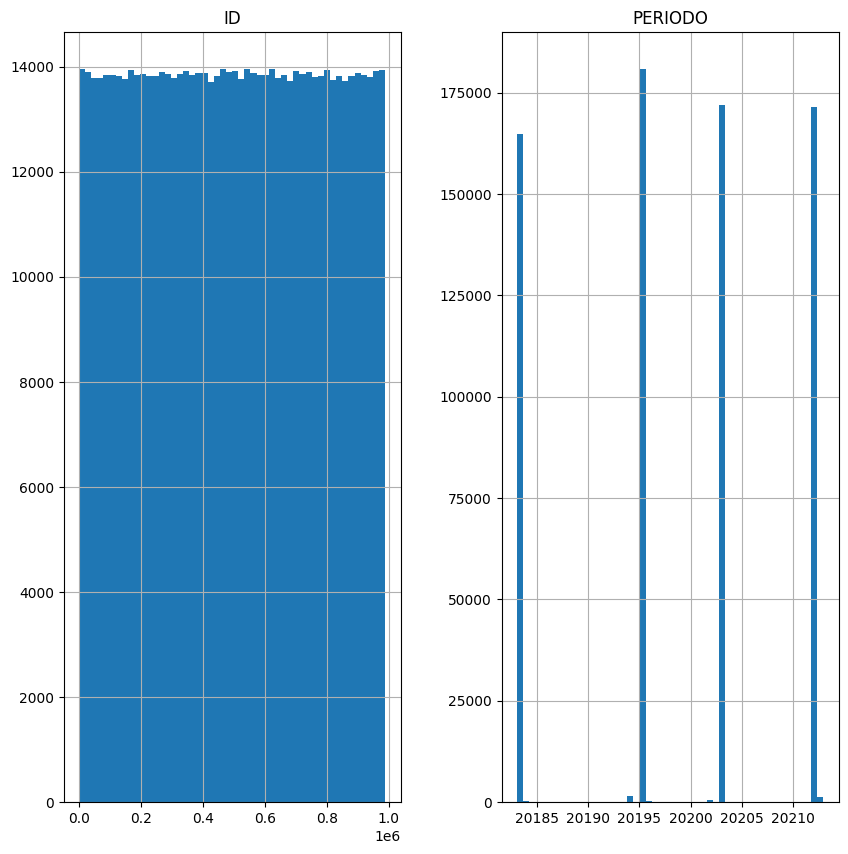

In [ ]:
train.hist(bins=50, figsize=(10,10))

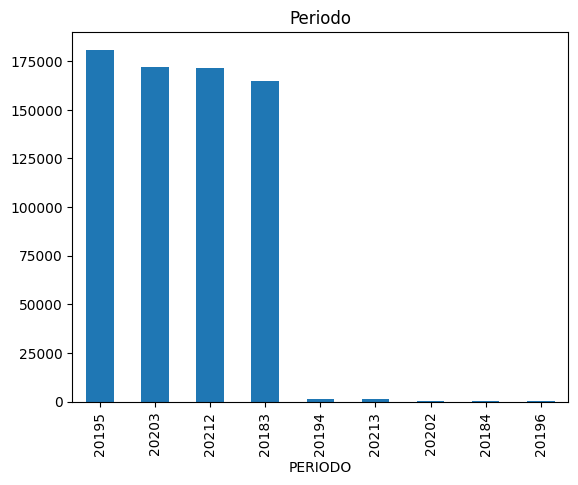

In [29]:
plot = train['PERIODO'].value_counts().plot(kind='bar',
                                            title='Periodo')